## Introducción a la Probabilidad y Estadística
## Tarea

En esta tarea, utilizaremos el conjunto de datos de pacientes con diabetes tomado [de aquí](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("D:\RNG\PersonalCodes\Data-Science-For-Beginners\data\diabetes.tsv",sep='\t')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\PTEE.Monitoreo\AppData\Local\Temp\ipykernel_31396\1313071980.py:1: SyntaxWarning: invalid escape sequence '\R'
  df = pd.read_csv("D:\RNG\PersonalCodes\Data-Science-For-Beginners\data\diabetes.tsv",sep='\t')


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


En este conjunto de datos, las columnas son las siguientes:
* Edad y sexo son autoexplicativos
* BMI es el índice de masa corporal
* BP es la presión arterial promedio
* S1 a S6 son diferentes mediciones de sangre
* Y es la medida cualitativa de la progresión de la enfermedad durante un año

Estudiemos este conjunto de datos utilizando métodos de probabilidad y estadística.

### Tarea 1: Calcular valores medios y varianza para todos los valores


In [42]:
pd.DataFrame([df.mean(),df.var()],index=['Mean','Variance']).head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
Mean,48.51810,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
Variance,171.84661,0.249561,19.519798,191.304401,1197.717241,924.955494,167.293585,1.665261,0.272892,132.165712,5943.331348


### Tarea 2: Graficar diagramas de caja para BMI, BP y Y dependiendo del género


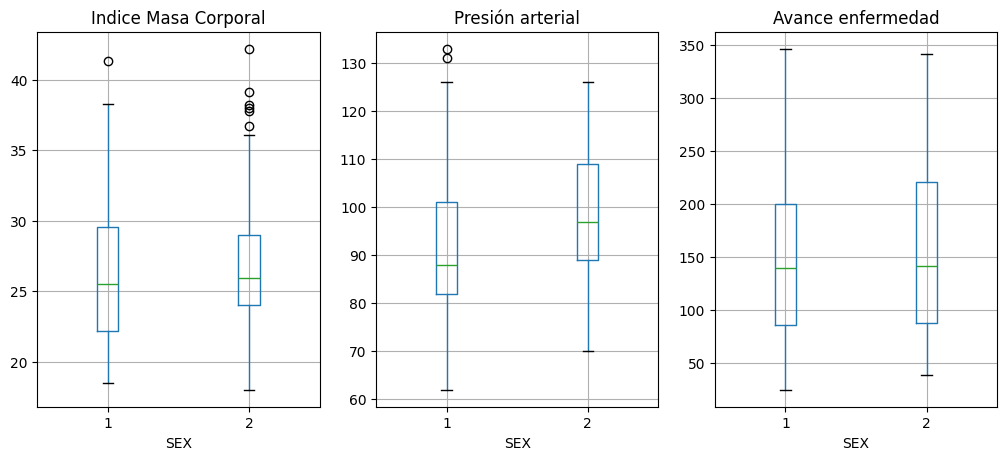

In [36]:
fig, (ax1, ax2, ax3) =plt.subplots(1, 3, figsize=(12,5))

df.boxplot(column='BMI', by='SEX', ax=ax1)
ax1.set_title('Indice Masa Corporal')

df.boxplot(column='BP', by='SEX', ax=ax2)
ax2.set_title('Presión arterial')

df.boxplot(column='Y', by='SEX', ax=ax3)
ax3.set_title('Avance enfermedad')

plt.suptitle(None)

plt.show()

### Tarea 3: ¿Cuál es la distribución de las variables Edad, Sexo, IMC y Y?

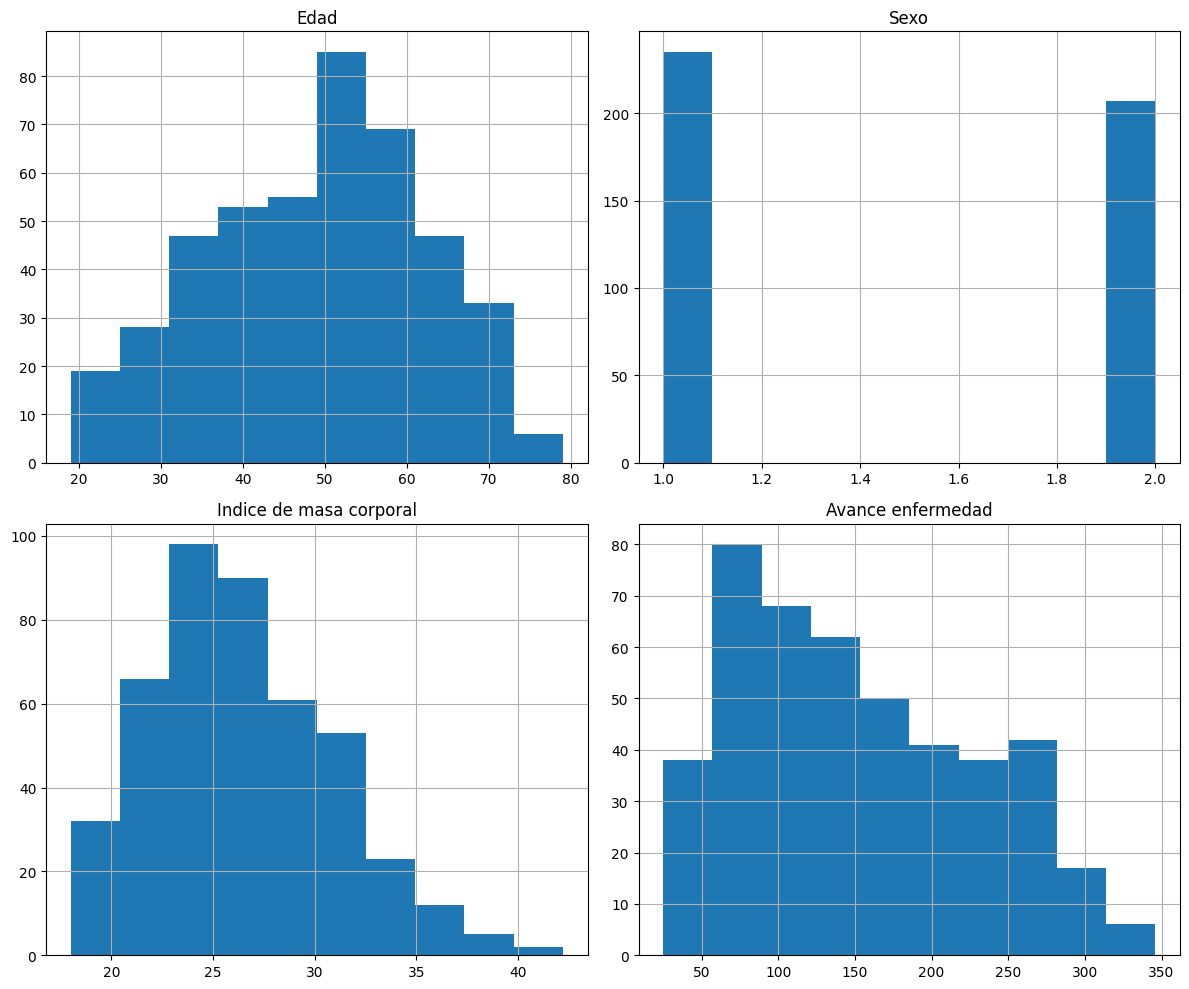

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,10))

df['AGE'].hist(ax=ax1)
ax1.set_title('Edad')

df['SEX'].hist(ax=ax2)
ax2.set_title('Sexo')

df['BMI'].hist(ax=ax3)
ax3.set_title('Indice de masa corporal')

df['Y'].hist(ax=ax4)
ax4.set_title('Avance enfermedad')

plt.tight_layout()
plt.show()


- ***Edad***: Distribución normal.
- ***Sexo***: uniforme
- ***IMC***: indeterminado (la media no se encuentra en el medio de los datos)
- ***Avance de enfermedad***: Indeterminado (la media no se encuentra en el medio de los datos)

### Tarea 4: Prueba la correlación entre diferentes variables y la progresión de la enfermedad (Y)

> **Sugerencia** La matriz de correlación te proporcionará la información más útil sobre qué valores son dependientes.


In [6]:
df.corr()['Y']

AGE    0.187889
SEX    0.043062
BMI    0.586450
BP     0.441482
S1     0.212022
S2     0.174054
S3    -0.394789
S4     0.430453
S5     0.565883
S6     0.382483
Y      1.000000
Name: Y, dtype: float64

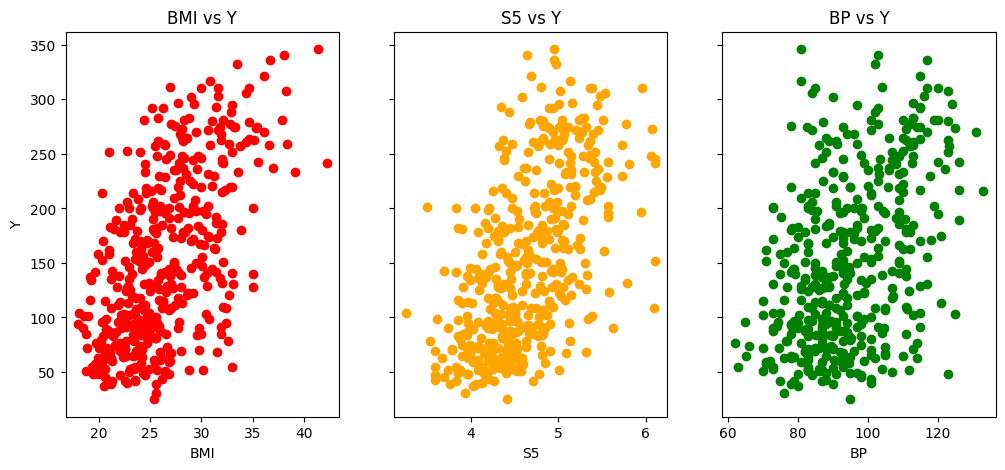

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,5), sharey=True)

ax1.scatter(df['BMI'], df['Y'], color='red')
ax1.set_title('BMI vs Y')
ax1.set_xlabel('BMI')
ax1.set_ylabel('Y')

ax2.scatter(df['S5'], df['Y'], color='orange')
ax2.set_title('S5 vs Y')
ax2.set_xlabel('S5')

ax3.scatter(df['BP'], df['Y'], color='green')
ax3.set_title('BP vs Y')
ax3.set_xlabel('BP')

plt.show()


### Tarea 5: Probar la hipótesis de que el grado de progresión de la diabetes es diferente entre hombres y mujeres.

In [8]:
from scipy.stats import ttest_ind
progreso_hombres = df.loc[df['SEX']==1,['Y']]
progreso_mujeres = df.loc[df['SEX']==2,['Y']]
tval, pval = ttest_ind(progreso_hombres, progreso_mujeres, equal_var=False)
print(f"Valor-T = {tval[0]:.3f}\nValor-P = {pval[0]}")

Valor-T = -0.902
Valor-P = 0.3674449793083975


<font color="red">**Valor-P:**</font> Es la probabilidad de que dos distribuciones normales tengan la misma media.

<font color="red">**Valor-T:**</font> Es el valor intermedio en la diferencia de medias normalizada que se utiliza en la prueba t, y se compara con un valor umbral para un nivel de confianza.

Debido a que se considera que valores del valor P por debajo de 0.05 <font color="red">***(Valor-P < 0.05)***</font> corresponden a una alta confianza en la hipótesis. Sin embargo, el valor obtenido no genera resultados concluyentes.


---

**Descargo de responsabilidad**:  
Este documento ha sido traducido utilizando el servicio de traducción automática [Co-op Translator](https://github.com/Azure/co-op-translator). Si bien nos esforzamos por lograr precisión, tenga en cuenta que las traducciones automáticas pueden contener errores o imprecisiones. El documento original en su idioma nativo debe considerarse como la fuente autorizada. Para información crítica, se recomienda una traducción profesional realizada por humanos. No nos hacemos responsables de malentendidos o interpretaciones erróneas que puedan surgir del uso de esta traducción.
